In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Getting the current working directory
current_working_directory = os.getcwd()

# Printing the current working directory
print("Current Working Directory:", current_working_directory)


Current Working Directory: /content


In [ ]:

# Replace 'your_file.csv' with the path to your CSV file
file_path = '/content/moq_static.csv'

df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the DataFrame
print(df.head())

   Frame Count Start Time End Time
0            0        NaN      NaN
1            1        NaN      NaN
2            2        NaN      NaN
3            3        NaN      NaN
4            4        NaN      NaN


In [ ]:
print("Column Names:", df.columns)


Column Names: Index(['Frame Count', 'Start Time', 'End Time'], dtype='object')


In [ ]:
# Remove rows where 'End Time' is missing
df.dropna(subset=['End Time'], inplace=True)

# Check the result
print(df.head())

     Frame Count                Start Time                  End Time
600          600   2024-01-23 11:45:44.037   2024-01-23 11:45:44.118
631          631   2024-01-23 11:45:45.337   2024-01-23 11:45:45.403
648          648   2024-01-23 11:45:46.040   2024-01-23 11:45:46.120
673          673   2024-01-23 11:45:47.082   2024-01-23 11:45:47.138
697          697   2024-01-23 11:45:48.084   2024-01-23 11:45:48.136


In [ ]:
# Convert 'Start Time' and 'End Time' to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])

# Calculate latency in milliseconds and store in a new column
df['Latency'] = (df['End Time'] - df['Start Time']).dt.total_seconds()

# Display the DataFrame to verify the results
print(df.head())

     Frame Count              Start Time                End Time  Latency
600          600 2024-01-23 11:45:44.037 2024-01-23 11:45:44.118    0.081
631          631 2024-01-23 11:45:45.337 2024-01-23 11:45:45.403    0.066
648          648 2024-01-23 11:45:46.040 2024-01-23 11:45:46.120    0.080
673          673 2024-01-23 11:45:47.082 2024-01-23 11:45:47.138    0.056
697          697 2024-01-23 11:45:48.084 2024-01-23 11:45:48.136    0.052


In [ ]:
print(df)


      Frame Count              Start Time                End Time  Latency
600           600 2024-01-23 11:45:44.037 2024-01-23 11:45:44.118    0.081
631           631 2024-01-23 11:45:45.337 2024-01-23 11:45:45.403    0.066
648           648 2024-01-23 11:45:46.040 2024-01-23 11:45:46.120    0.080
673           673 2024-01-23 11:45:47.082 2024-01-23 11:45:47.138    0.056
697           697 2024-01-23 11:45:48.084 2024-01-23 11:45:48.136    0.052
721           721 2024-01-23 11:45:49.084 2024-01-23 11:45:49.157    0.073
746           746 2024-01-23 11:45:50.126 2024-01-23 11:45:50.174    0.048
770           770 2024-01-23 11:45:51.128 2024-01-23 11:45:51.175    0.047
791           791 2024-01-23 11:45:52.005 2024-01-23 11:45:52.060    0.055
818           818 2024-01-23 11:45:53.122 2024-01-23 11:45:53.196    0.074
844           844 2024-01-23 11:45:54.206 2024-01-23 11:45:54.278    0.072
865           865 2024-01-23 11:45:55.090 2024-01-23 11:45:55.146    0.056
907           907 2024-01

In [ ]:
# Convert 'Start Time' to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])

# Calculate the base time (start of your interval)
base_time = pd.to_datetime('2024-01-23 11:45:44')

# Calculate the elapsed time in seconds since the base time
df['Adjusted Time'] = (df['Start Time'] - base_time).dt.total_seconds()

# Convert 'Latency' to milliseconds
df['Latency'] = df['Latency'] * 1000

average_latency = df['Latency'].mean()


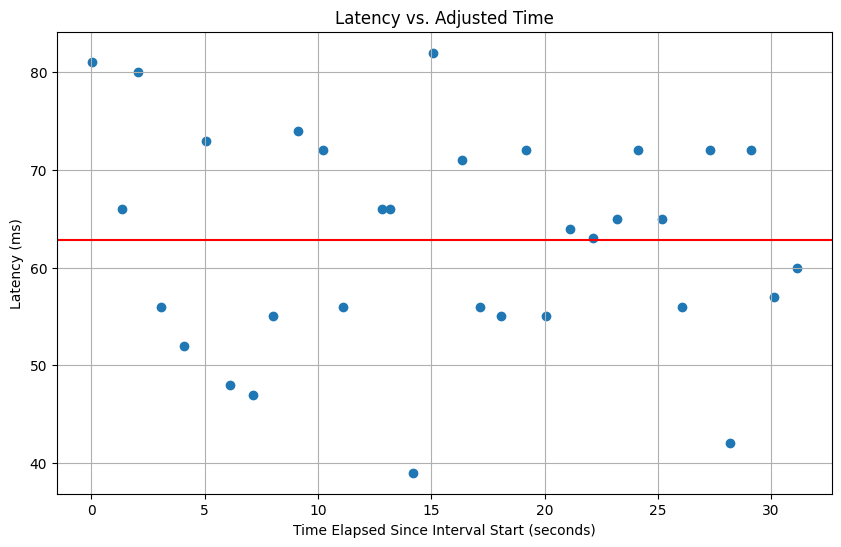

      Frame Count              Start Time                End Time  Latency  \
600           600 2024-01-23 11:45:44.037 2024-01-23 11:45:44.118     81.0   
631           631 2024-01-23 11:45:45.337 2024-01-23 11:45:45.403     66.0   
648           648 2024-01-23 11:45:46.040 2024-01-23 11:45:46.120     80.0   
673           673 2024-01-23 11:45:47.082 2024-01-23 11:45:47.138     56.0   
697           697 2024-01-23 11:45:48.084 2024-01-23 11:45:48.136     52.0   
721           721 2024-01-23 11:45:49.084 2024-01-23 11:45:49.157     73.0   
746           746 2024-01-23 11:45:50.126 2024-01-23 11:45:50.174     48.0   
770           770 2024-01-23 11:45:51.128 2024-01-23 11:45:51.175     47.0   
791           791 2024-01-23 11:45:52.005 2024-01-23 11:45:52.060     55.0   
818           818 2024-01-23 11:45:53.122 2024-01-23 11:45:53.196     74.0   
844           844 2024-01-23 11:45:54.206 2024-01-23 11:45:54.278     72.0   
865           865 2024-01-23 11:45:55.090 2024-01-23 11:45:55.14

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Adjusted Time'], df['Latency'], marker='o')
plt.axhline(y=average_latency, color='r', linestyle='-', label='Average Latency')

plt.xlabel('Time Elapsed Since Interval Start (seconds)')
plt.ylabel('Latency (ms)')
plt.title('Latency in a 30 second playback interval')
plt.grid(True)
plt.show()

print(df)

In [ ]:
# Calculate median and 0.75 quantile for Latency to provide insights into the distribution of latency values
median_latency = df['Latency'].median()
quantile_75_latency = df['Latency'].quantile(0.75)

print("Median Latency (ms):", median_latency)
print("0.75 Quantile of Latency (ms):", quantile_75_latency)


Median Latency (ms): 64.5
0.75 Quantile of Latency (ms): 72.0


In [ ]:
df['Latency'].describe()

count    32.000000
mean     62.812500
std      10.999817
min      39.000000
25%      55.750000
50%      64.500000
75%      72.000000
max      82.000000
Name: Latency, dtype: float64

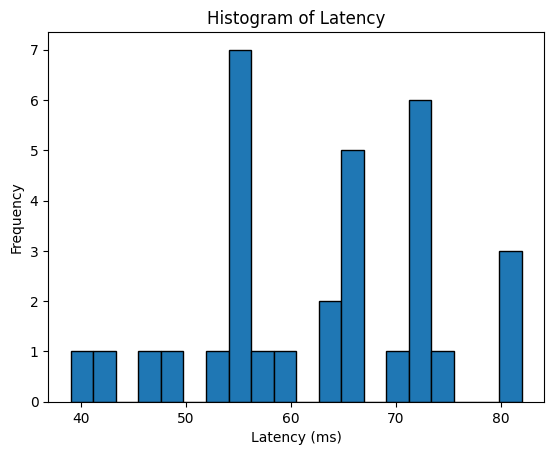

In [ ]:
plt.hist(df['Latency'], bins=20, edgecolor='black')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Latency')
plt.show()

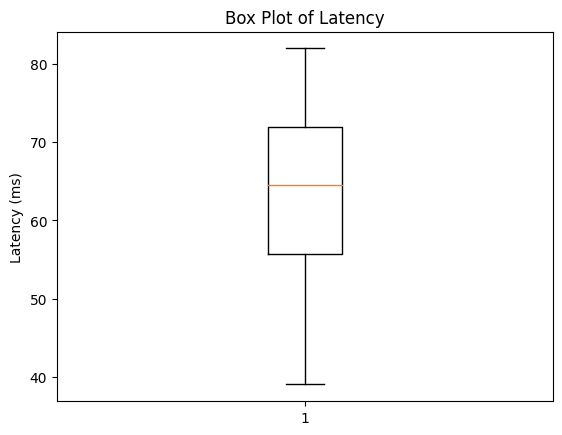

In [ ]:
plt.boxplot(df['Latency'])
plt.ylabel('Latency (ms)')
plt.title('Box Plot of Latency')
plt.show()

In [ ]:
# Calculating the percentage decrease in latency from WebRTC to WebTransport
average_latency_webrtc = 70.064516  # in ms
average_latency_webtransport = 62.812500  # in ms

percentage_decrease = ((average_latency_webrtc - average_latency_webtransport) / average_latency_webrtc) * 100
percentage_decrease


10.350483260313963